In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train_original = train.copy()
test_original = test.copy()

In [ ]:
train.columns

In [ ]:
test.columns

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Univariate Analysis

## Target variable

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

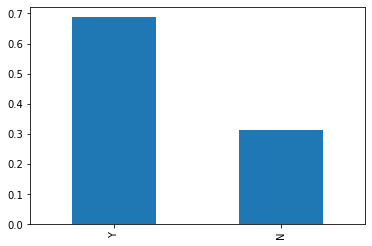

In [9]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

## Categorical independent variables

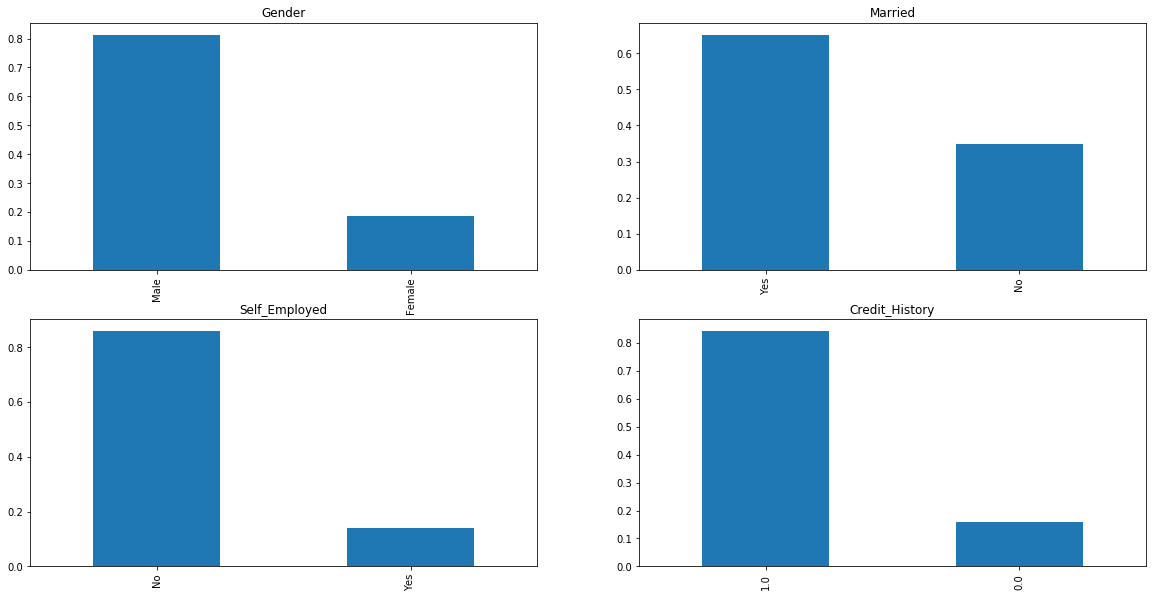

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

## Independent Ordinal variables

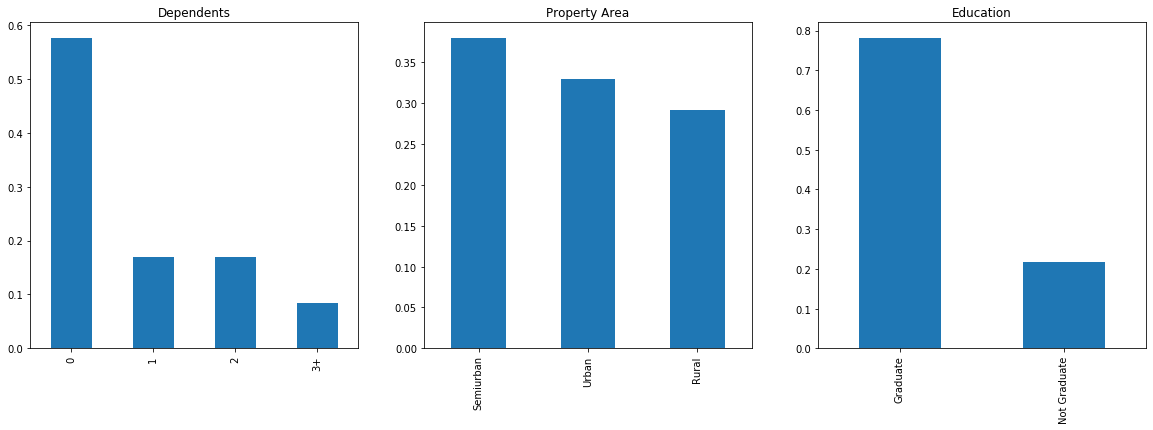

In [11]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20, 6), title='Dependents')
plt.subplot(132)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.subplot(133)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

## Independent Numerical variables

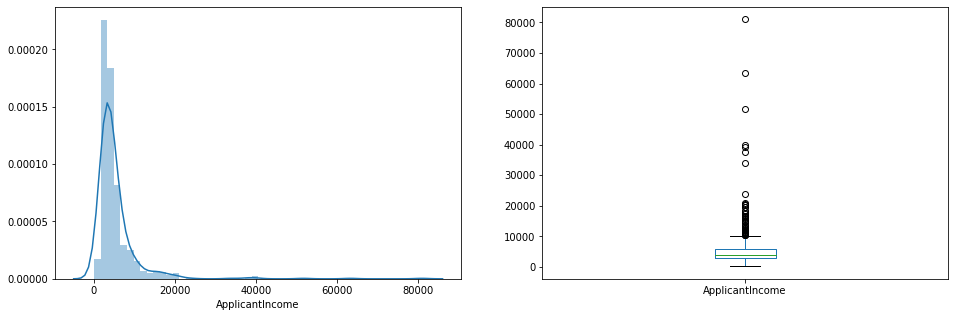

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

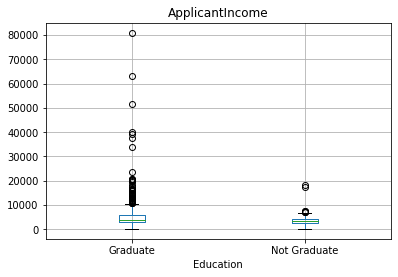

In [13]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

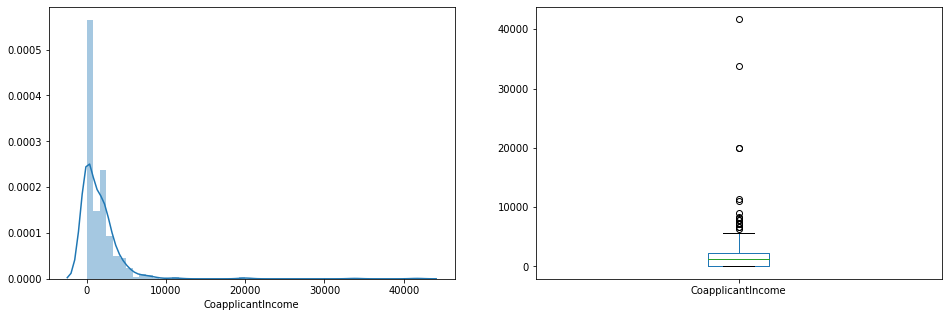

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

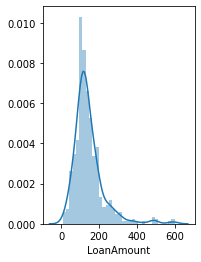

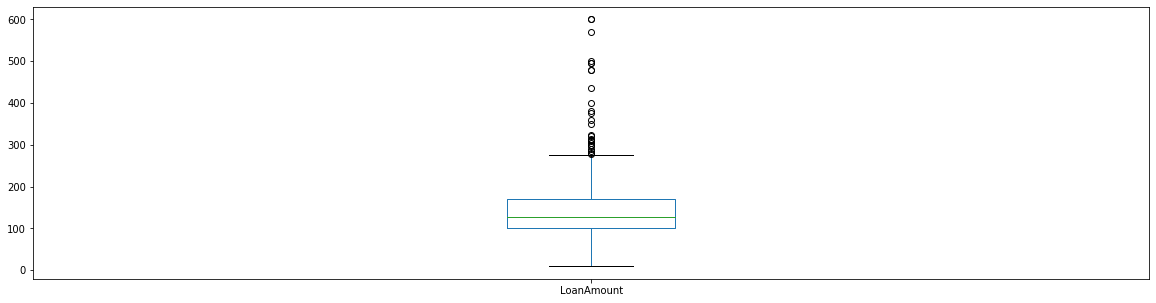

In [15]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.figure(122)
df['LoanAmount'].plot.box(figsize=(20,5))
plt.show()

## Bivariate analysis

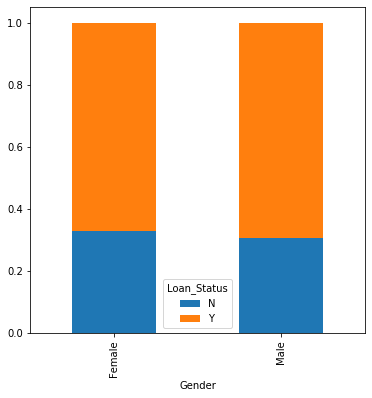

In [16]:
# Cria Dataframe com o produto cartesiano, totalizando os valores
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

# Realiza a divisão dos valores para cada combinação pelo total de cada combinação, gerando uma proporção
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

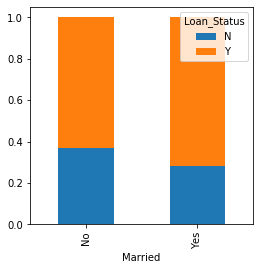

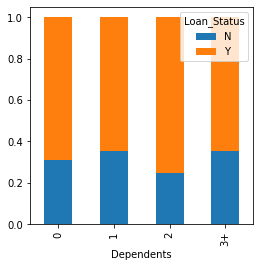

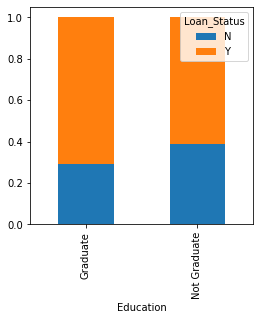

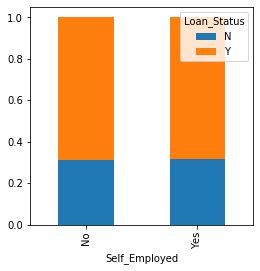

In [17]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

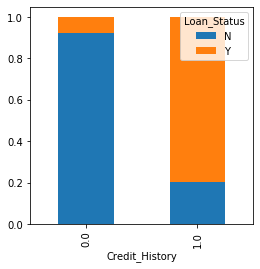

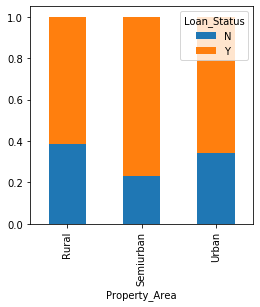

In [18]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

## Numerical Independent variable vs Target Variable

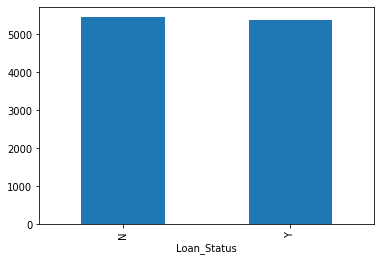

In [19]:
# train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind="bar")
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

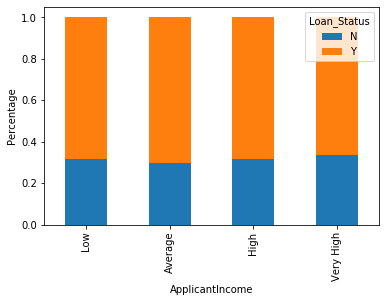

In [20]:
# Nenhuma informação baseando pela média
# Dividindo o ApplicantIncome em faixa para avaliar
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']

train['Income_Bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_Bin = pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

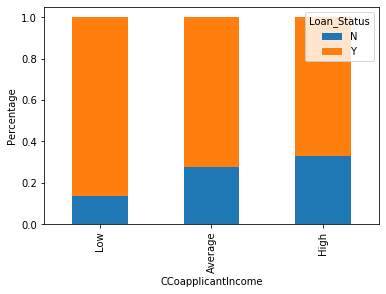

In [21]:
bins=[0,1000,3000,42000]
group=['Low', 'Average', 'High']

train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_Bin=pd.crosstab(train['Coapplicant_Income_Bin'], train['Loan_Status'])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('CCoapplicantIncome')
_ = plt.ylabel('Percentage')


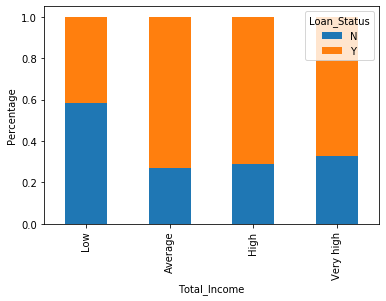

In [24]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
_ = plt.ylabel('Percentage')

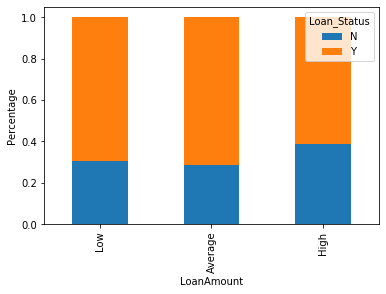

In [25]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [26]:
# dropa colunas criadas na EDA
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

# Ajusta valores dependentes para numerico 3+ -> 3
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

# troca valores do target, Loan_Status, para numerico
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [ ]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Missing value imputation

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [31]:
# Preenchemos o campo LoanAmount com a mediana, pois, como temos outliers nessa feature 
# a média é muito afetada por eles
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [32]:
# Usando mesma abordagem para o dataset de teste
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

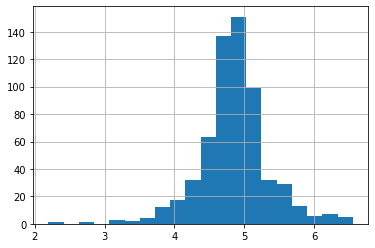

In [33]:
# Tratando os outliers. Vimos que a distribuição é right skewness. 
# Podemos usar o log para tratar, pois, afetará pouco os valores pequenos, e reduzirá os valores grandes
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [34]:
# Aplicando no dataset test
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [37]:
# Dropando a coluna ID, não tem interesse para o modelo
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [38]:
# Separando preditores e alvo em datasets diferentes
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [39]:
# Criando dummy variavéis. Poderia ser utilizado a classe OneHotEncoder
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [40]:
# Iremos dividir o dataset de treino para usar parte dele como validação do modelo
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [48]:
# Usaremos como baseline o modelo de regressão logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Realizando predições para os dados de validação

pred_cv = model.predict(x_cv)

accuracy_score(y_cv, pred_cv)

0.7567567567567568

In [54]:
# Realizando predições para os dados de teste

pred_test = model.predict(test)

In [55]:
# Carregando o arquivo para submissão

submission = pd.read_csv('data/submission.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [59]:
# Para submeter precisamos enviar Y ou N como alvo

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [62]:
submission.reset_index()

,index,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,N
...,...,...,...
362,362,LP002971,N
363,363,LP002975,Y
364,364,LP002980,Y
365,365,LP002986,Y


In [65]:
# Convertendo o dataframe pra csv para envio

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('data/logistic.csv', index=False)

In [103]:
# Com o primeiro envio obtemos acurracia: 0.7361111
# Vamos buscar treinar usando K-fold para buscar melhorar o modelo

from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=13, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression()
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f'\n{i} of kfold {kf.n_splits} accuracy score: {score}')

    i += 1
    
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    


1 of kfold 13 accuracy score: 0.7708333333333334

2 of kfold 13 accuracy score: 0.875

3 of kfold 13 accuracy score: 0.75

4 of kfold 13 accuracy score: 0.8723404255319149

5 of kfold 13 accuracy score: 0.7659574468085106

6 of kfold 13 accuracy score: 0.8085106382978723

7 of kfold 13 accuracy score: 0.7872340425531915

8 of kfold 13 accuracy score: 0.8297872340425532

9 of kfold 13 accuracy score: 0.723404255319149

10 of kfold 13 accuracy score: 0.7659574468085106

11 of kfold 13 accuracy score: 0.7872340425531915

12 of kfold 13 accuracy score: 0.7872340425531915

13 of kfold 13 accuracy score: 0.8723404255319149


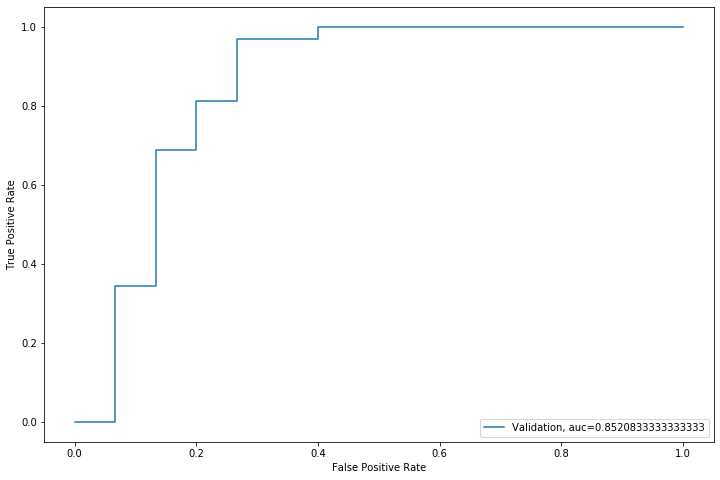

In [104]:
# Plotando a curva ROC

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="Validation, auc=" + str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)

plt.show()


In [94]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# submission.to_csv('data/logistic_kfold_10.csv', index=False)
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('data/logistic_kfold_11.csv', index=False)

In [105]:
# Máxima acurácia foi de: 0.7847222222 para KFold com 13 splits
# TODO: Testar o uso da classe StratifiedShuffleSplit

# Criaremos 3 novos atributos:
# 1. Total Income: somando o income do aplicante e coaplicante. Hipotese: Quanto maior a soma maior a chance
# 2. EMI: Valor da mensalidade, Total emprestimo / tempo emprestimo. Hipo: Quanto menor mais chances
# 3. Balance Income: Salario menos a prestação. hipo: Quanto maior melhor

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

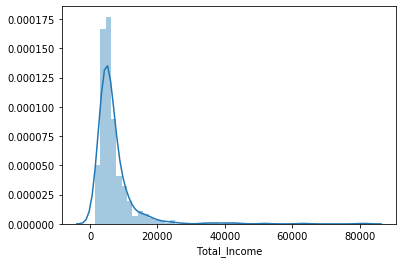

In [106]:
# Verificando a distribuição para o Tota_Income.

sns.distplot(train['Total_Income'])

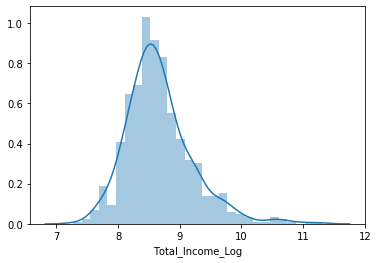

In [107]:
# Vemos que é enviesada. Vamos tomar o log para aproximar uma normal

train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log'])

test['Total_Income_Log'] = np.log(test['Total_Income'])

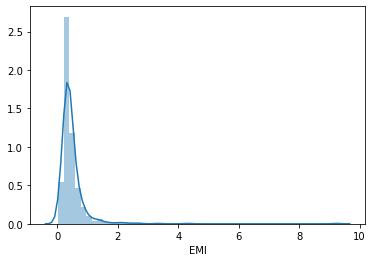

In [108]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

sns.distplot(train['EMI'])

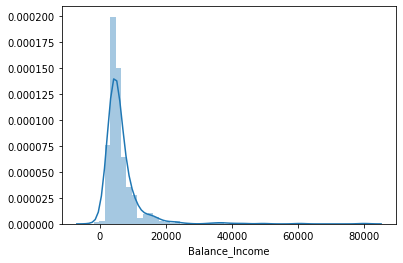

In [109]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)

sns.distplot(train['Balance_Income'])

In [ ]:
# Devemos remover as variáveis que usamos para criar essas novas.
# O motivo é a correlação que as novas e antigas terão entre si, removendo-as eliminamos também o ruído do ds

train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [114]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [116]:
# Vamos montar os modelos: LogisticRegression, DecisionTree, RandomForrest e XGBoost, após a Feature Eng

## LogisticRegression
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=13, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression()
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f'\n{i} of kfold {kf.n_splits} accuracy score: {score}')

    i += 1
    
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]


1 of kfold 13 accuracy score: 0.75

2 of kfold 13 accuracy score: 0.875

3 of kfold 13 accuracy score: 0.75

4 of kfold 13 accuracy score: 0.8936170212765957

5 of kfold 13 accuracy score: 0.7659574468085106

6 of kfold 13 accuracy score: 0.8297872340425532

7 of kfold 13 accuracy score: 0.7659574468085106

8 of kfold 13 accuracy score: 0.851063829787234

9 of kfold 13 accuracy score: 0.6595744680851063

10 of kfold 13 accuracy score: 0.7659574468085106

11 of kfold 13 accuracy score: 0.8085106382978723

12 of kfold 13 accuracy score: 0.7872340425531915

13 of kfold 13 accuracy score: 0.851063829787234


In [128]:
def prepara_submission():
    submission['Loan_Status'] = pred_test
    submission['Loan_ID'] = test_original['Loan_ID']

    submission['Loan_Status'].replace(0, 'N', inplace=True)
    submission['Loan_Status'].replace(1, 'Y', inplace=True)
    
prepara_submission()
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('data/logistic_kfold_5_FeatEng.csv', index=False)    

In [129]:
# DecisionTree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#tree_clf = DecisionTreeClassifier()

#scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')
#scores.mean()

i = 1
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f'\n{i} of kfold {kf.n_splits} accuracy score: {score}')

    i += 1
    
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    
prepara_submission()
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('data/decision_tree_kf_5_FeatEng.csv', index=False)    


1 of kfold 5 accuracy score: 0.7317073170731707

2 of kfold 5 accuracy score: 0.7317073170731707

3 of kfold 5 accuracy score: 0.6585365853658537

4 of kfold 5 accuracy score: 0.6504065040650406

5 of kfold 5 accuracy score: 0.7540983606557377


In [130]:
# Performance piorou
# Vamos tentar outro modelo: RandomForrest

from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f'\n{i} of kfold {kf.n_splits} accuracy score: {score}')

    i += 1
    
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]
    
prepara_submission()
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('data/random_forrest.csv', index=False)    



1 of kfold 5 accuracy score: 0.7317073170731707

2 of kfold 5 accuracy score: 0.7317073170731707

3 of kfold 5 accuracy score: 0.6585365853658537

4 of kfold 5 accuracy score: 0.6504065040650406

5 of kfold 5 accuracy score: 0.7540983606557377
